# AUEB M.Sc. in Data Science (part-time)

**Course**: Machine Learning and Computational Statistics

**Semester**: Winter 2018

**7th homework**

**Author**: Spiros Politis

---

In [1]:
import numpy as np

import pandas as pd

import scipy.io as sio
from scipy.stats import *

from sklearn import *
from sklearn.datasets import *
from sklearn.preprocessing import *
from sklearn.mixture import *
from sklearn.naive_bayes import *
from sklearn.neighbors import *
from sklearn.metrics import *

import matplotlib.pyplot as plt
import matplotlib.patches as patches
from mpl_toolkits.mplot3d import Axes3D

import seaborn as sns

In [2]:
# Aesthetics for plots
plot_main_title_font = {
    "family": "sans serif",
    "color":  "black",
    "weight": "bold",
    "size": 18,
}

plot_axis_title_font = {
    "family": "sans serif",
    "color":  "black",
    "weight": "bold",
    "size": 14,
}

## Exercise 1

### Answer

The general form of the normal PDF is:

$$f(x; \mu, \sigma^{2}) = \frac{1}{\sqrt{2\pi\sigma^{2}}} \cdot e^{-\frac{(x-\mu)^{2}}{2\sigma^{2}}}$$

Since the two classes are equiprobable, we are not concerned with their prior probabilities.

The PDFs of classes $\omega_{1}$ and $\omega_{2}$, respectivelly, are thus modelled by the following expressions:

$$f_{\omega_{1}}(x; \mu = 0, \sigma^{2} = 1) = \frac{1}{\sqrt{2 \pi \cdot 1}} \cdot e^{-\frac{(x - 0)^{2}}{2 \cdot 1}} \textbf{ (1)}$$

and

$$f_{\omega_{2}}(x; \mu = 0, \sigma^{2} = 5) = \frac{1}{\sqrt{2 \pi \cdot 5}} \cdot e^{-\frac{(x - 0)^{2}}{2 \cdot 5}} \textbf{ (2)}$$

Since the a PDF is everywhere positive by definition, we can take the natural log of $\textbf{(1)}$ and $\textbf{(2)}$ and equate them, to find their intersection points, thereby analytically solving the following:

$$ln \left( \frac{1}{\sqrt{2 \pi}} \cdot e^{-\frac{x^{2}}{2}} \right) = ln \left( \frac{1}{\sqrt{10 \pi}} \cdot e^{-\frac{x^{2}}{10}} \right) \implies$$

$$ln \left( \frac{1}{\sqrt{2\pi}} \right) + ln \left( e^{-\frac{x^{2}}{2}} \right) = ln \left( \frac{1}{\sqrt{10\pi}} \right) + ln \left( e^{-\frac{x^{2}}{10}} \right) \implies$$

$$-\frac{1}{2} ln(2\pi) - \frac{x^{2}}{2} = -\frac{1}{2} ln(10\pi) - \frac{x^{2}}{10} \implies$$

$$-5 ln(2\pi) - 5x^{2} = -5 ln(10\pi) - x^{2} \implies$$

$$-4 x^{2} = -8.05 \implies$$

$$x^{2} = 2.01 \implies$$

$$x \in \{1.42, -1.42\}$$

Therefore we have the following class regions:
    
Class region $\omega_{1}$: $ R_{\omega_{1}} = {x: x \gt -1.42, x \lt 1.42} $

Class region $\omega_{2}$: $ R_{\omega_{2}} = {x: x \lt -1.42, x \gt 1.42} $

We can also solve our problem computationally and visualize the result:

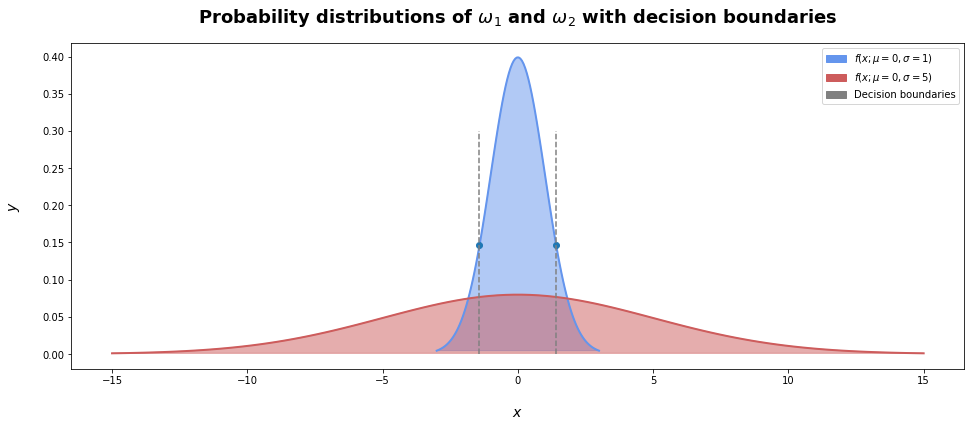

In [3]:
def find_intersection_points(mu_1, sigma_1, mu_2, sigma_2):
    std_1 = np.sqrt(sigma_1)
    std_2 = np.sqrt(sigma_2)
    
    a = 1 / (2 * std_1 ** 2) - 1 / (2 * std_2**2)
    b = mu_2 / (std_2**2) - mu_1 / (std_1**2)
    c = mu_1**2 / (2 * std_1**2) - mu_2**2 / (2 * std_2**2) - np.log(std_2 / std_1)
    
    return np.roots([a, b, c])

# Parameters of the first class (omega 1) PDF (X ~ N(0, 1))
mu_1 = 0
sigma_1 = 1

# Parameters of the second class (omega 2) PDF (X ~ N(0, 5))
mu_2 = 0
sigma_2 = 5

# Points for PDF X ~ N(0, 1)
x_1 = np.linspace(mu_1 - (3 * sigma_1), mu_1 + (3 * sigma_1), 100, np.float64)
y_1 = norm.pdf(x_1, mu_1, sigma_1)

# Points for PDF X ~ N(0, 5)
x_2 = np.linspace(mu_2 - (3 * sigma_2), mu_2 + (3 * sigma_2), 100, np.float64)
y_2 = norm.pdf(x_2, mu_2, sigma_2)

# Point(s) of intersection
x = find_intersection_points(mu_1, sigma_1, mu_2, sigma_2)

# Plot
fig, ax = plt.subplots(figsize = (16, 6), sharex = True, sharey = True)

# Plot PDF of X ~ N(0, 1)
ax.plot(x_1, y_1, linewidth = 2, color = "cornflowerblue")
ax.fill(x_1, y_1, alpha = 0.5, color = "cornflowerblue")

# Plot PDF of X ~ N(0, 5)
ax.plot(x_2, y_2, linewidth = 2, color = "indianred")
ax.fill(x_2, y_2, alpha = 0.5, color = "indianred")

# Plot decision boundaries
ax.plot(x, norm.pdf(x, mu_2, np.sqrt(sigma_2)), "o")
ax.plot(np.full(shape = 100, fill_value = x[0]), np.linspace(0, 0.3, 100), linestyle = "dashed", color = "grey")
ax.plot(np.full(shape = 100, fill_value = x[1]), np.linspace(0, 0.3, 100), linestyle = "dashed", color = "grey")

# Set graph title
ax.set_title(r"Probability distributions of $\omega_{1}$ and $\omega_{2}$ with decision boundaries", fontdict = plot_main_title_font, pad = 20)

# Set graph axis labels
ax.set_xlabel(r"$x$", fontdict = plot_axis_title_font, labelpad = 20)
ax.set_ylabel(r"$y$", fontdict = plot_axis_title_font, labelpad = 20)

# Set plot legend
label_x_1 = patches.Patch(color = "cornflowerblue", label = "$f(x; \mu = 0, \sigma = 1)$")
label_x_2 = patches.Patch(color = "indianred", label = "$f(x; \mu = 0, \sigma = 5)$")
label_boundaries = patches.Patch(color = "grey", label = "Decision boundaries")
ax.legend(handles = [label_x_1, label_x_2, label_boundaries])

pass;

<mark>**Note**: There is something wrong with the plotting code, the intersection points should be at [-1.41837844  1.41837844].</mark>

<mark>Not removing it for posterity.</mark>

---

## Exercise 2

In [4]:
def plot_ex_2(mu_omega_1, sigma_omega_1, mu_omega_2, sigma_omega_2):
    # Plot the distribution
    fig, ax = plt.subplots(figsize = (16, 12), sharey = True)
    ax = plt.axes(projection = "3d")
    ax.view_init(elev = 45, azim = -75)

    # Create data grid for the 1st bivariate PDF
    x_1, y_1 = np.meshgrid(np.linspace(-10, 10, 100), np.linspace(-10, 10, 100))
    sample_1 = np.empty(x_1.shape + (2, ))
    sample_1[:, :, 0] = x_1
    sample_1[:, :, 1] = y_1
    omega_1_dist = multivariate_normal(mu_omega_1, sigma_omega_1)

    # Plot the bivariate 1st PDF
    # ax.contour(x_1, y_1, omega_1_dist.pdf(sample_1), 50, cmap = "Blues", alpha = 0.7)
    ax.plot_surface(x_1, y_1, omega_1_dist.pdf(sample_1), rstride = 1, cstride = 1, cmap = "Blues", alpha = 0.2, linewidth = 1, antialiased = False)
    
    # Create data grid for the 2nd bivariate PDF
    x_2, y_2 = np.meshgrid(np.linspace(-10, 10, 100), np.linspace(-10, 10, 100))
    sample_2 = np.empty(x_2.shape + (2, ))
    sample_2[:, :, 0] = x_2
    sample_2[:, :, 1] = y_2
    omega_2_dist = multivariate_normal(mu_omega_2, sigma_omega_2)
    
    # Plot the bivariate 2nd PDF
    # ax.contour3D(x_2, y_2, omega_2_dist.pdf(sample_2), 50, cmap = "Reds", alpha = 0.7)
    ax.plot_surface(x_2, y_2, omega_2_dist.pdf(sample_2), rstride = 1, cstride = 1, cmap = "Reds", alpha = 0.2, linewidth = 1, antialiased = False)
    
    # Plot the classifier-bordering line
    ax.plot(
        np.repeat(np.array([(mu_omega_1[0] + mu_omega_2[0]) / 2]), 100),
        np.repeat(np.array([(mu_omega_1[1] + mu_omega_2[1]) / 2]), 100),
        np.linspace(0, np.max(omega_2_dist.pdf(sample_2)), 100),
        "--",
        color = "grey",
        linewidth = 3
    )

    # Plot the perpendicular bisector segment
    ax.plot(
        np.linspace(mu_omega_1[0], mu_omega_2[0], 100), 
        np.linspace(mu_omega_1[1], mu_omega_2[1], 100), 
        (np.max(omega_2_dist.pdf(sample_2)) - np.min(omega_2_dist.pdf(sample_2))) / 2,
        "--",
        color = "orange",
        linewidth = 3
    )

    # Set plot title
    ax.set_title("Bivariate normal distributions (example)", fontdict = plot_main_title_font, pad = 40)

    # Set plot axis labels
    ax.set_xlabel(r"$x$", fontdict = plot_axis_title_font, labelpad = 10)
    ax.set_ylabel(r"$y$", fontdict = plot_axis_title_font, labelpad = 10)
    ax.set_zlabel(r"$z$", fontdict = plot_axis_title_font, labelpad = 10)

    # Set plot legend
    label_dist_1 = patches.Patch(color = "cornflowerblue", label = "Multivariate normal 1")
    label_dist_2 = patches.Patch(color = "indianred", label = "Multivariate normal 2")
    label_dist_means_line = patches.Patch(color = "grey", label = "Classifier-bordering segment")
    label_perpendicular_bisector_line = patches.Patch(color = "orange", label = "Perpendicular bisector segment")
    ax.legend(handles = [label_dist_1, label_dist_2, label_dist_means_line, label_perpendicular_bisector_line])

    pass;

Our first observation, since the two classes are equiprobable, is that we are not concerned with their prior probabilities.

We also observe the the two multivariate Gaussian distributions have different parameters for their mean vector $\boldsymbol{\mu_{i}}$ and equal covariance matrices $\boldsymbol{\Sigma} = \sigma^{2}I$.

### Answer (a)

Visualizing a two random multivariate distributions with differenet parameters $\mu$ and the same covariance $\Sigma$:

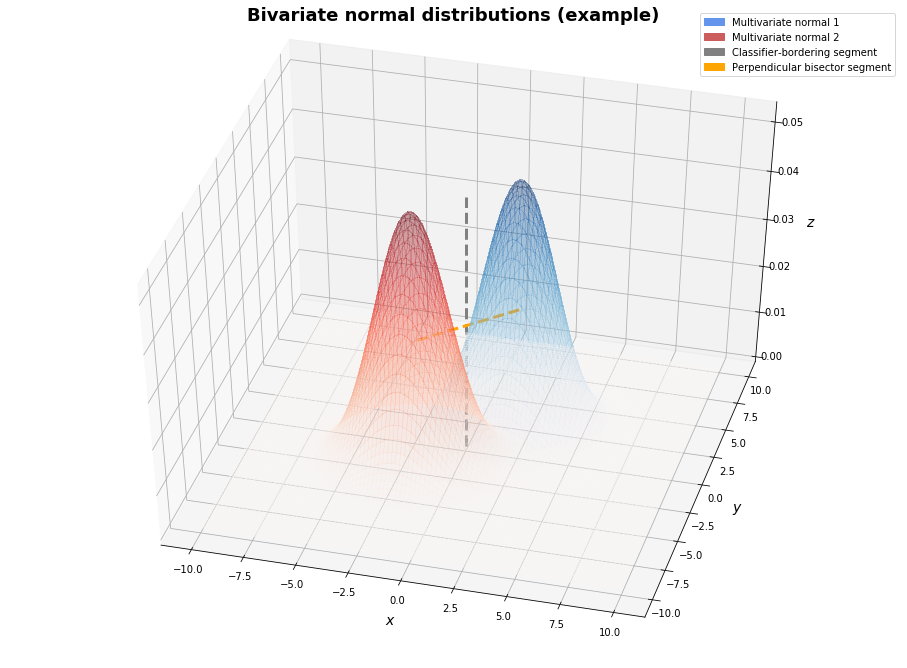

In [5]:
# Common covariance for the two multivariate Gaussians
sigma = 3

# Multivariate Gaussian 1 parameters
mu_omega_1 = np.array([2, 2])
sigma_omega_1 = sigma * np.eye(2)

# Multivariate Gaussian 2 parameters
mu_omega_2 = np.array([-2, -2])
sigma_omega_2 = sigma * np.eye(2)

plot_ex_2(mu_omega_1, sigma_omega_1, mu_omega_2, sigma_omega_2)

Intuitively we can tell that the decision boundary, formed at the intersection of the surfaces of the two Gaussians, will be parallel to the perpendicualr bisector of the line segment whose endpoints are $\mu_{1}$ and $\mu_{2}$. Also, the decision boundary will have a common point with the perpendicual bisector.

The generic form of the PDF of the multivariate Gaussian is:

$$f(x; \boldsymbol{\mu}, \Sigma) = \frac{1}{\sqrt{(2\pi)^{k} |\Sigma|}} e^{ -\frac{1}{2} (\boldsymbol{x} - \boldsymbol{\mu})^{T} \Sigma^{-1} (\boldsymbol{x} - \boldsymbol{\mu})}$$

where $k$ = dimensionality of $\boldsymbol{x}$.

The decision boundary for this case is given by:

$$
f(x; \boldsymbol{\mu_{1}}, \Sigma) = f(x; \boldsymbol{\mu_{2}}, \Sigma) \implies
$$

$$
\frac{1}{\sqrt{(2\pi)^{2} |\Sigma|}} e^{ -\frac{1}{2} (\boldsymbol{x} - \boldsymbol{\mu_{1}})^{T} \Sigma^{-1} (\boldsymbol{x} - \boldsymbol{\mu_{1}})} = \frac{1}{\sqrt{(2\pi)^{2} |\Sigma|}} e^{ -\frac{1}{2} (\boldsymbol{x} - \boldsymbol{\mu_{2}})^{T} \Sigma^{-1} (\boldsymbol{x} - \boldsymbol{\mu_{2}})} \implies
$$

$$
ln(e^{ -\frac{1}{2} (\boldsymbol{x} - \boldsymbol{\mu_{1}})^{T} \Sigma^{-1} (\boldsymbol{x} - \boldsymbol{\mu_{1}})}) = ln(e^{ -\frac{1}{2} (\boldsymbol{x} - \boldsymbol{\mu_{2}})^{T} \Sigma^{-1} (\boldsymbol{x} - \boldsymbol{\mu_{2}})}) \implies
$$

$$
-\frac{1}{2} (\boldsymbol{x} - \boldsymbol{\mu_{1}})^{T} \Sigma^{-1} (\boldsymbol{x} - \boldsymbol{\mu_{1}}) = -\frac{1}{2} (\boldsymbol{x} - \boldsymbol{\mu_{2}})^{T} \Sigma^{-1} (\boldsymbol{x} - \boldsymbol{\mu_{2}}) \implies
$$

$$
(\boldsymbol{x} - \boldsymbol{\mu_{1}})^{T} (\boldsymbol{x} - \boldsymbol{\mu_{1}}) =  (\boldsymbol{x} - \boldsymbol{\mu_{2}})^{T} (\boldsymbol{x} - \boldsymbol{\mu_{2}}) \textbf{ (1)}
$$

Because the covariance matrix is the same, $\textbf{(1)}$ represents a first order degree curve (hyperplane). In other words, the classifier is the intersection line of the two multivariate Gaussians, projected on the x, y plane.

Showing that $\textbf{(1)}$ intersects $(\boldsymbol{x}_{1} − \boldsymbol{x}_{2})^{T}\boldsymbol{x} − \frac{1}{2}||\boldsymbol{x}_{1}||^{2} + \frac{1}{2}||\boldsymbol{x}_{2}||^{2} = 0$, where $\boldsymbol{x} = [x_{1}, x_{2}]^{T}$ should give us the solution.

### Answer (b)

We create a new random covariance matrix, such that $\Sigma \neq \sigma^{2}I$:

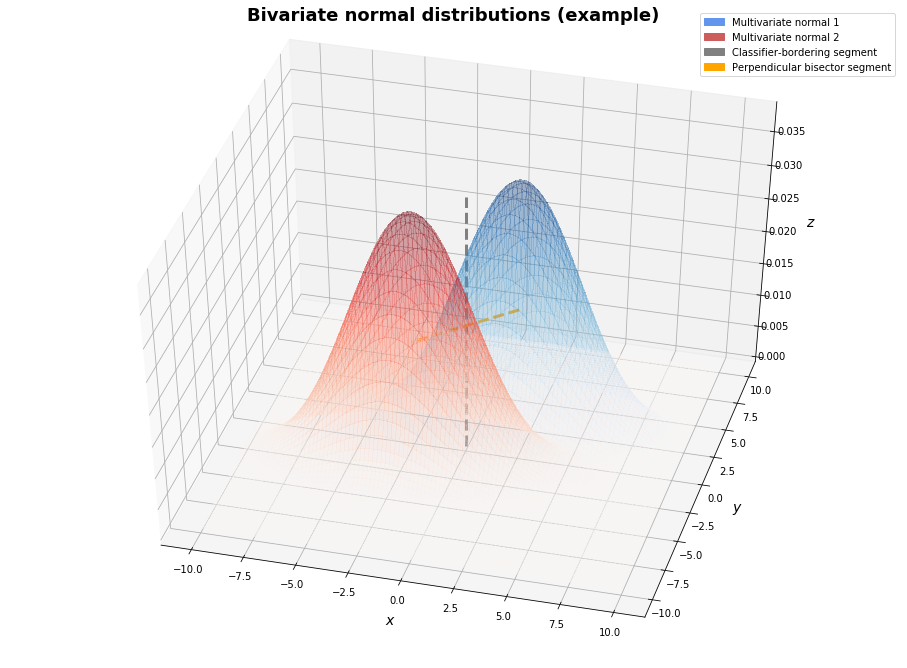

In [6]:
# Generate a random symmetric, positive-definite matrix.
sigma = make_spd_matrix(n_dim = 2, random_state = 19730618) * 3

# Multivariate Gaussian 1 parameters
mu_omega_1 = np.array([2, 2])
sigma_omega_1 = sigma

# Multivariate Gaussian 2 parameters
mu_omega_2 = np.array([-2, -2])
sigma_omega_2 = sigma

plot_ex_2(mu_omega_1, sigma_omega_1, mu_omega_2, sigma_omega_2)

---

## Exercise 3

Note: The PDF of the uniform distribution is given by:

$$f(x; a, b) = \frac{1}{b-a}$$

where $a$, $b$ the lower and upper bounds of the function domain, respectivelly.

### Answer (I)(i)

Graphically:

In [7]:
# Height of the uniform dist: 1 / (b - a)
def uniform_dist_height(function_domain):
    a = list()
    
    for interval in function_domain:
        a += set(np.arange(interval[0], interval[1]))
        
    a = set(a)
    
    return 1 / len(a)

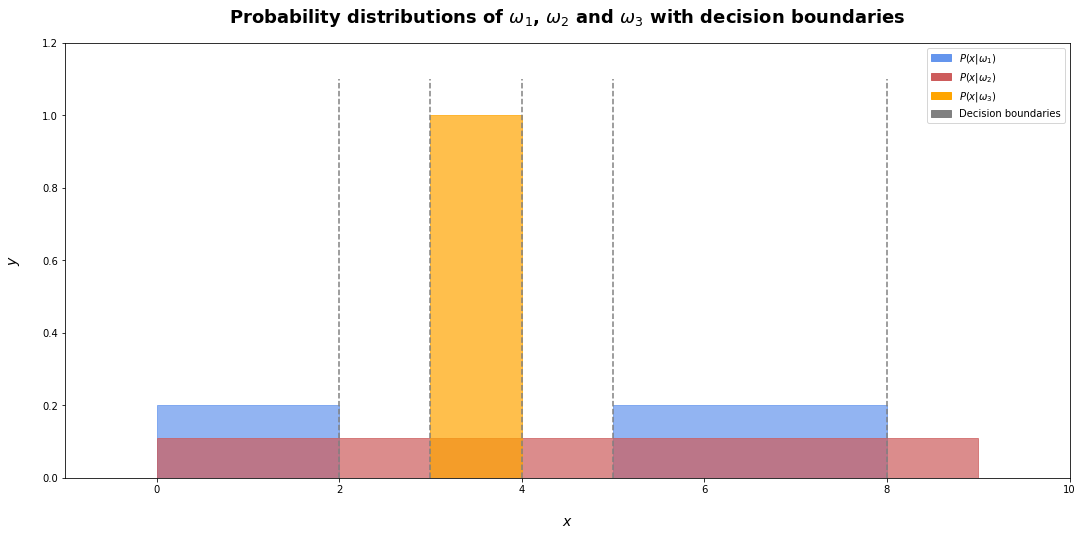

In [8]:
# Height of the uniform dist: 1 / (b - a)
def uniform_dist_height(function_domain):
    a = list()
    
    for interval in function_domain:
        a += set(np.arange(interval[0], interval[1]))
        
    a = set(a)
    
    return 1 / len(a)

# Plot
fig, ax = plt.subplots(figsize = (18, 8), sharex = True, sharey = True)

# Plot PDF of X ~ U(0, 2), (5, 8)
interval_omega_1 = [[0, 2], [5, 8]]
height_omega_1 = uniform_dist_height(interval_omega_1)
ax.fill(
    [
        interval_omega_1[0][0], interval_omega_1[0][0], interval_omega_1[0][1], interval_omega_1[0][1],
        interval_omega_1[1][0], interval_omega_1[1][0], interval_omega_1[1][1], interval_omega_1[1][1]
    ], 
    [
        0, height_omega_1, height_omega_1, 0,
        0, height_omega_1, height_omega_1, 0
    ], 
    
    color = "cornflowerblue", 
    alpha = 0.7
)

# Plot PDF of X ~ U(0, 9)
interval_omega_2 = [[0, 9]]
height_omega_2 = uniform_dist_height(interval_omega_2)
ax.fill(
    [
        interval_omega_2[0][0], interval_omega_2[0][0], interval_omega_2[0][1], interval_omega_2[0][1]
    ], 
    [
        0, height_omega_2, height_omega_2, 0
    ], 
    
    color = "indianred", 
    alpha = 0.7
)

# Plot PDF of X ~ U(3, 4)
interval_omega_3 = [[3, 4]]
height_omega_3 = uniform_dist_height(interval_omega_3)
ax.fill(
    [
        interval_omega_3[0][0], interval_omega_3[0][0], interval_omega_3[0][1], interval_omega_3[0][1]
    ], 
    [
        0, height_omega_3, height_omega_3, 0
    ], 
    
    color = "orange", 
    alpha = 0.7
)

# Plot decision boundaries
ax.plot(np.full(shape = 100, fill_value = 2), np.linspace(0, 1.1, 100), linestyle = "dashed", color = "grey")
ax.plot(np.full(shape = 100, fill_value = 3), np.linspace(0, 1.1, 100), linestyle = "dashed", color = "grey")
ax.plot(np.full(shape = 100, fill_value = 4), np.linspace(0, 1.1, 100), linestyle = "dashed", color = "grey")
ax.plot(np.full(shape = 100, fill_value = 5), np.linspace(0, 1.1, 100), linestyle = "dashed", color = "grey")
ax.plot(np.full(shape = 100, fill_value = 8), np.linspace(0, 1.1, 100), linestyle = "dashed", color = "grey")

# Set the axes limits
x_axis_min = -1
x_axis_max = 10
ax.set_xlim(left = x_axis_min, right = x_axis_max)
ax.set_ylim(bottom = 0, top = 1.2)

# Set graph title
ax.set_title(r"Probability distributions of $\omega_{1}$, $\omega_{2}$ and $\omega_{3}$ with decision boundaries", fontdict = plot_main_title_font, pad = 20)

# Set graph axis labels
ax.set_xlabel(r"$x$", fontdict = plot_axis_title_font, labelpad = 20)
ax.set_ylabel(r"$y$", fontdict = plot_axis_title_font, labelpad = 20)

# Set plot legend
label_omega_1 = patches.Patch(color = "cornflowerblue", label = "$P(x|\omega_{1})$")
label_omega_2 = patches.Patch(color = "indianred", label = "$P(x|\omega_{2})$")
label_omega_3 = patches.Patch(color = "orange", label = "$P(x|\omega_{3})$")
label_boundaries = patches.Patch(color = "grey", label = "Decision boundaries")
ax.legend(handles = [label_omega_1, label_omega_2, label_omega_3, label_boundaries])

pass;

### Answer (I)(ii)

Intuitively, the classification error probability is given by the intersection of the graphs of the PDFs of the distributions.

Mathematically, it is given by:
    
$$P_{error} = \sum_{i=1}^{N} \int_{R_{}} \left( \sum_{j=1, j \neq i}^{N} P(x|\omega_{j})P(\omega_{j}) \right) \mathrm{d}x$$

where $N$ is the number of classes.

In this case, the error will be:

$$P_{error} = \sum_{i=1}^{3} \int_{R_{j}} \left( \sum_{j=1, j \neq i}^{3} P(x|\omega_{j})P(\omega_{j}) \right) \mathrm{d}x =$$

$$
\int_{R_{1}} \left( P(x|\omega_{2})P(\omega_{2}) + P(x|\omega_{3})P(\omega_{3}) \right) \mathrm{d}x +
\int_{R_{2}} \left( P(x|\omega_{1})P(\omega_{1}) + P(x|\omega_{3})P(\omega_{3}) \right) \mathrm{d}x +
\int_{R_{3}} \left( P(x|\omega_{1})P(\omega_{1}) + P(x|\omega_{2})P(\omega_{2}) \right) \mathrm{d}x
\textbf{ (1)}
$$

Because the classes are equiprobable with probability $\frac{1}{3}$, $\textbf{(1)}$ becomes:

$$
\frac{1}{3} 
\left(
\int_{R_{1}} \left( P(x|\omega_{2}) + P(x|\omega_{3}) \right) \mathrm{d}x +
\int_{R_{2}} \left( P(x|\omega_{1}) + P(x|\omega_{3}) \right) \mathrm{d}x +
\int_{R_{3}} \left( P(x|\omega_{1}) + P(x|\omega_{2}) \right) \mathrm{d}x
\right)
\textbf{ (2)}
$$

Evaluating $\textbf{(2)}$ and since we observe that the only class that overlaps others is $R_{2}$ we get:

$$
\frac{1}{3} 
\left(
\int_{0}^{2} P(x|\omega_{2}) dx + \int_{3}^{4} P(x|\omega_{2}) dx + \int_{5}^{8} P(x|\omega_{2}) \mathrm{d}x
\right) =
$$

$$
\frac{1}{3} 
\left(
\int_{0}^{2} \frac{1}{9}x dx + \int_{3}^{4} \frac{1}{9}x dx + \int_{5}^{8} \frac{1}{9}x \mathrm{d}x
\right) =
$$

$$
\frac{1}{3} 
\left(
\left. \frac{1}{9}x \right|_{0}^{2} + \left. \frac{1}{9}x \right|_{3}^{4} + \left. \frac{1}{9}x \right|_{5}^{8}
\right) =
$$

$$
\frac{1}{3} 
\left(
\frac{2}{9} + \frac{1}{9} + \frac{3}{9}
\right) =
$$

$$
0.222
$$

### Answer (I)(iii)

Observe from the graph that, for $x = 3.5$, the observation falls in the decision regions of $R_{2}$ and $R_{3}$. However, $R_{3}$ has a higher probability in the interval $(3, 4)$, therefore the classifier will classify the observation as belonging to class $\omega_{3}$.

### Answer (II)(i)

Since $x' = 3.5$ falls in the interval [3, 4] we are only interested in the the distributions of classes that encompass this interval. We have established that $x' = 3.5$ will be classified as belonging to class $\omega_{3}$ in the current scheme of equiprobable classes. In order to avoid this and, under the assumption that the classes are not equiprobable, we would have to make sure that the posterior probability of $\omega_{3}$ is lower than $\omega_{2}$.

In order to achieve this, the decision rule would have to satisfy:

$$
P(\omega_{2}) * P(x|\omega_{2}) \gt P(\omega_{3}) * P(x|\omega_{3}) \implies
$$

$$
P(\omega_{2}) * \int_{3}^{4} P(x|\omega_{2}) \gt P(\omega_{3}) * \int_{3}^{4} P(x|\omega_{3}) \implies
$$

$$
P(\omega_{2}) * \left( \left. \frac{1}{9}x \right|_{3}^{4} \right) \gt P(\omega_{3}) * \left( \left. x \right|_{3}^{4} \right)
$$

$$
\frac{1}{9}P(\omega_{2}) \gt P(\omega_{3}) \implies
$$

$$
P(\omega_{2}) \gt 9P(\omega_{3})
$$

 We conclude that the prior probability of $\omega_{2}$ should be more than 9 times the prior probability of $\omega_{3}$, in order to classify $x' = 3.5$ as belonging to $\omega_{2}$.

### Answer (II)(ii)

Since $x' = 3.5$ falls in the interval [3, 4] and we observe that the distribution of $\omega_{1}$ is not defined in this interval, we conclude that its likelihood is zero, which leads us to further conclude that no value for the prior could be applied such that $x' = 3.5$ would be classified as belonging to $\omega_{1}$, because the posterior would always be zero:

$$P(\omega_{1}|x) = P(\omega_{1}) * P(x|\omega_{1}) \implies$$

$$P(\omega_{1}|x) = P(\omega_{1}) * 0 \implies$$

$$P(\omega_{1}|x) = 0$$

---

## Exercise 4

Loading the data set:

In [9]:
training_set = sio.loadmat("Training_set.mat")
train_x = training_set["train_x"]
train_y = training_set["train_y"]

test_set = sio.loadmat("Test_set.mat")
test_x = test_set["test_x"]
test_y = test_set["test_y"]

Since we are in a "sane" number of dimensions, we can visualise the data set given:

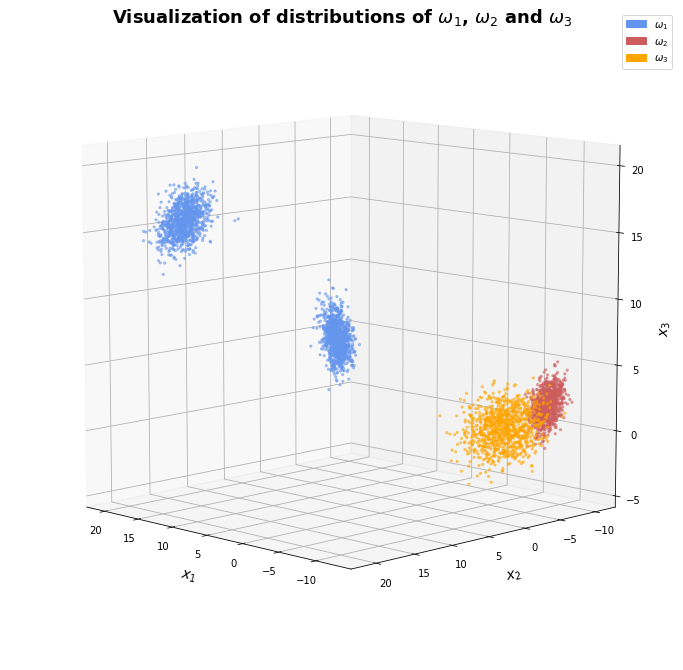

In [10]:
# Plot the distributions of the observations
fig, ax = plt.subplots(figsize = (12, 12))
ax = plt.axes(projection = "3d")
ax.view_init(elev = 10, azim = 135)

# Plot observations
# Class omega_1
omega_1_indices = np.where(train_y == 1)[0]
ax.scatter(train_x[omega_1_indices, 0], train_x[omega_1_indices, 1], train_x[omega_1_indices, 2], c = "cornflowerblue", marker = ".", alpha = 0.5)

# Class omega_2
omega_2_indices = np.where(train_y == 2)[0]
ax.scatter(train_x[omega_2_indices, 0], train_x[omega_2_indices, 1], train_x[omega_2_indices, 2], c = "indianred", marker = ".", alpha = 0.5)

# Class omega_3
omega_3_indices = np.where(train_y == 3)[0]
ax.scatter(train_x[omega_3_indices, 0], train_x[omega_3_indices, 1], train_x[omega_3_indices, 2], c = "orange", marker = ".", alpha = 0.5)

# Set plot title
ax.set_title("Visualization of distributions of $\omega_{1}$, $\omega_{2}$ and $\omega_{3}$", fontdict = plot_main_title_font, pad = 40)

# Set plot axis labels
ax.set_xlabel(r"$x_{1}$", fontdict = plot_axis_title_font, labelpad = 10)
ax.set_ylabel(r"$x_{2}$", fontdict = plot_axis_title_font, labelpad = 10)
ax.set_zlabel(r"$x_{3}$", fontdict = plot_axis_title_font, labelpad = 10)

# Set plot legend
label_omega_1 = patches.Patch(color = "cornflowerblue", label = "$\omega_{1}$")
label_omega_2 = patches.Patch(color = "indianred", label = "$\omega_{2}$")
label_omega_3 = patches.Patch(color = "orange", label = "$\omega_{3}$")
ax.legend(handles = [label_omega_1, label_omega_2, label_omega_3])

pass;

Observe that $\omega_{1}$ observations stem from a **Gaussian mixture**, while classes $\omega_{2}$ and $\omega_{3}$ from corresponding **multivariate Gaussians**. Another observation is that $\omega_{1}$ is clearly seperable from the set, while $\omega_{2}$ and $\omega_{3}$ seem to be overlapping.

We need to estimate the **prior** distributions of each class, which will be evaluated by employing the frequentist approach of dividing the number of observations per class by the total number of observations, i.e.:

$$P(\omega_{i}) = \frac{N_{i}}{N}$$

where $N_{i}$: number of occurences for class $i$, $i \in \{1, 2, 3\}$, $N$: total number of observations.

In [11]:
N = len(train_y)

omega_1_label = 1
omega_2_label = 2
omega_3_label = 3

omega_1_prior = np.count_nonzero(train_y == omega_1_label) / N
omega_2_prior = np.count_nonzero(train_y == omega_2_label) / N
omega_3_prior = np.count_nonzero(train_y == omega_3_label) / N

priors = pd.DataFrame([
    ["$\omega_{1}$", omega_1_prior],
    ["$\omega_{2}$", omega_2_prior],
    ["$\omega_{3}$", omega_3_prior]
], columns = ["Class", "Prior ($P(\omega_{i})$)"])
priors

,Class,Prior ($P(\omega_{i})$)
0,$\omega_{1}$,0.50
1,$\omega_{2}$,0.25
2,$\omega_{3}$,0.25


(i) **Parametric** approach

### Answer (a)

For parametric modelling of $\omega_{1}$, since it follows a Gaussian mixture distribution, we shall use the class *sklearn.mixture.GaussianMixture* from SciKit Learn:

In [12]:
# Parameterising and fitting a Gaussian mixture model
omega_1_dist = GaussianMixture(n_components = 2)
omega_1_dist.fit(train_x[np.where(train_y == omega_1_label)[0], :])

GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
        means_init=None, n_components=2, n_init=1, precisions_init=None,
        random_state=None, reg_covar=1e-06, tol=0.001, verbose=0,
        verbose_interval=10, warm_start=False, weights_init=None)

The posterior probabilities of the Gaussian mixture model will be computed next. We will use the *score_samples* function from the *sklearn.mixture.GaussianMixture* class for this purpose, since the function *predict_proba* computes the probability of each example belonging to a component of the mixture. However, since *score_samples* computes the weighted log probabilities for each sample we will need to exponentiate so as to get the actual probability value:

In [13]:
omega_1_posterior = omega_1_prior * np.exp(omega_1_dist.score_samples(test_x).reshape(N, 1))

For parametric modelling of $\omega_{2}$ and $\omega_{3}$, since they follow a  multivariate Gaussian, we know that the ML estimators of parameters $\mu$, $\Sigma$ are given by the sample means and the sample covariance matrix, respectively. Note that we will use the biased estimator of $\Sigma$:

In [14]:
omega_2_mu = np.mean(train_x[np.where(train_y == omega_2_label)[0], :], axis = 0)
omega_2_sigma = np.cov(train_x[np.where(train_y == omega_2_label)[0], :].T, bias = False)

omega_3_mu = np.mean(train_x[np.where(train_y == omega_3_label)[0], :], axis = 0)
omega_3_sigma = np.cov(train_x[np.where(train_y == omega_3_label)[0], :].T, bias = False)

omega_gaussian_parameters = pd.DataFrame([
    ["$\omega_{2}$", omega_2_mu, omega_2_sigma],
    ["$\omega_{3}$", omega_3_mu, omega_3_sigma]
], columns = ["Class", "$\mu$", "$\Sigma$"])
omega_gaussian_parameters

,Class,$\mu$,$\Sigma$
0,$\omega_{2}$,"[-9.983968625520411, -7.98653199622214, 1.9873...","[[0.458002930162254, 0.2455221670311025, -0.19..."
1,$\omega_{3}$,"[-6.042165045858638, -6.052467477585254, 0.051...","[[4.97840084075135, 0.14635648020215902, -0.13..."


Subsequently, we get the two multivariate Gaussians:

In [15]:
omega_2_dist = multivariate_normal(mean = omega_2_mu, cov = omega_2_sigma)
omega_3_dist = multivariate_normal(mean = omega_3_mu, cov = omega_3_sigma)

We can now compute the posterior probabilities for each class:

In [16]:
omega_2_posterior = omega_2_prior * omega_2_dist.pdf(test_x).reshape(N, 1)
omega_3_posterior = omega_3_prior * omega_3_dist.pdf(test_x).reshape(N, 1)

Finally, we retrieve the estimated class labels of all parametric models in the Btest_y vector:

In [17]:
# Concatenate all posterior probabilities in one Nx3 dimensional matrix
# Each row contains the probability reported by each parametric model
# for the class in the respective column (i.e. column 0 represents the
# first model, column 2 the seconds etc.)
all_posteriors = np.hstack([omega_1_posterior, omega_2_posterior, omega_3_posterior])

# Find the column index where the maximum posterior probability occurs
# and add 1 to go from 0-based indexing to actual class label
Btest_y = np.argmax(all_posteriors, axis = 1).reshape(N, 1) + 1

### Answer (b)

We now need to compute the classification error for each parametric model:

In [18]:
# Compute correctly classified examples as interpreting ocurrences of test cases
# where their class clabel is equal to the output label of the classifier
correctly_classified = np.count_nonzero(Btest_y == test_y)

# Similarly, erronoeusly classified instances are all examples not classified correctly
# i.e. the difference of N - correctly classified, where N is the total number of test cases
erroneously_classfied = N - correctly_classified

classification_metrics = pd.DataFrame([
    [correctly_classified / N, erroneously_classfied / N]
], columns = ["Accuracy (%)", "Error (%)"])
classification_metrics

,Accuracy (%),Error (%)
0,0.988,0.012


(ii) **Non-parametric** approach

### Answer (a)

We will fit a k-NN classifier, as implemented in SciKit Learn:

In [19]:
knn_clf = KNeighborsClassifier(n_neighbors = 7, n_jobs = -1)
knn_clf_fitted = knn_clf.fit(train_x, train_y.reshape(N))

In [20]:
Btest_y = knn_clf_fitted.predict(test_x).reshape(N, 1)

In [21]:
Btest_y.shape

(4000, 1)

### Answer (b)

In [22]:
# Compute correctly classified examples as interpreting ocurrences of test cases
# where their class clabel is equal to the output label of the classifier
correctly_classified = np.count_nonzero(Btest_y == test_y)

# Similarly, erronoeusly classified instances are all examples not classified correctly
# i.e. the difference of N - correctly classified, where N is the total number of test cases
erroneously_classfied = N - correctly_classified

classification_metrics = pd.DataFrame([
    [correctly_classified / N, erroneously_classfied / N]
], columns = ["Accuracy (%)", "Error (%)"])
classification_metrics

,Accuracy (%),Error (%)
0,0.98375,0.01625


---